<a href="https://colab.research.google.com/github/Ghadanur/aqi-predictor/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('merged_aqi_features.csv')
print(df)

Saving merged_aqi_features.csv to merged_aqi_features (12).csv
                 Timestamp  AQI  OW AQI  \
0      2025-07-12 20:00:00   70       3   
1      2025-07-12 20:00:00   71       3   
2      2025-07-12 20:00:00   71       3   
3      2025-07-12 20:00:00   71       3   
4      2025-07-12 20:00:00   71       3   
...                    ...  ...     ...   
11015  2025-07-26 18:00:00   63       4   
11016  2025-07-26 18:00:00   63       4   
11017  2025-07-26 18:00:00   63       4   
11018  2025-07-26 18:00:00   63       4   
11019  2025-07-26 18:00:00   63       4   

                              US AQI Equivalent  PM2.5    PM10     CO   NO₂  \
0      101–150 (Unhealthy for Sensitive Groups)  14.90   60.51  75.62  0.08   
1      101–150 (Unhealthy for Sensitive Groups)  14.90   60.51  75.62  0.08   
2      101–150 (Unhealthy for Sensitive Groups)  14.90   60.51  75.62  0.08   
3      101–150 (Unhealthy for Sensitive Groups)  14.90   60.51  75.62  0.08   
4      101–150 (Unhealthy

In [273]:
import pandas as pd
# Create lag features
for lag in [1, 2, 3]:
    df[f'AQI(t-{lag})'] = df['AQI'].shift(lag)
    df[f'Temp(t-{lag})'] = df['Temp (°C)'].shift(lag)
    df[f'Humidity(t-{lag})'] = df['Humidity (%)'].shift(lag)
    df[f'Wind(t-{lag})'] = df['Wind Speed'].shift(lag)
    df[f'PM2.5(t-{lag})'] = df['PM2.5'].shift(lag)
    df[f'PM10(t-{lag})'] = df['PM10'].shift(lag)
    df[f'CO(t-{lag})'] = df['CO'].shift(lag)
    df[f'NO₂(t-{lag})'] = df['NO₂'].shift(lag)
    df[f'O₃(t-{lag})'] = df['O₃'].shift(lag)
    # Add more if you want

# Create future target columns
df['AQI(t)'] = df['AQI']
df['AQI(t+1)'] = df['AQI'].shift(-1)
df['AQI(t+2)'] = df['AQI'].shift(-2)
df_model = df.dropna().reset_index(drop=True)
feature_cols = [
    'AQI(t-1)', 'AQI(t-2)', 'AQI(t-3)',
    'Temp(t-1)', 'Humidity(t-1)', 'Wind(t-1)',
    'PM2.5(t-1)', 'PM10(t-1)', 'CO(t-1)', 'NO₂(t-1)','O₃(t-1)'
]

target_cols = ['AQI(t)', 'AQI(t+1)', 'AQI(t+2)']




In [274]:
from sklearn.model_selection import train_test_split

X = df_model[feature_cols]
y = df_model[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [287]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

# Evaluation
for i, col in enumerate(target_cols):
    rmse = np.sqrt(mean_squared_error(y_test[col], preds[:, i]))
    mae = mean_absolute_error(y_test[col], preds[:, i])
    r2 = r2_score(y_test[col], preds[:, i])
    print(f"📊 {col} — RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


📊 AQI(t) — RMSE: 1.62, MAE: 0.58, R²: 0.91
📊 AQI(t+1) — RMSE: 1.84, MAE: 0.76, R²: 0.89
📊 AQI(t+2) — RMSE: 2.17, MAE: 1.03, R²: 0.84


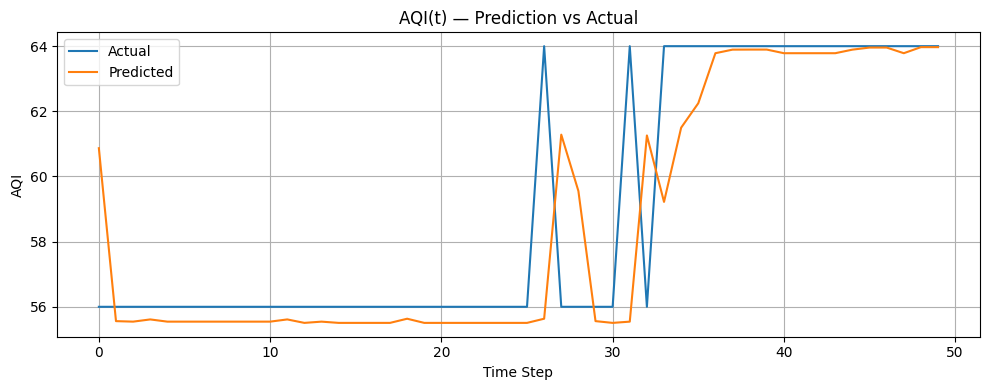

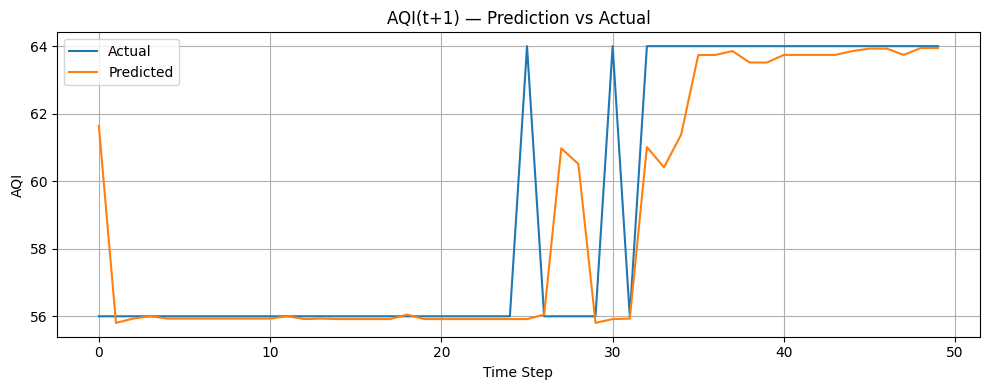

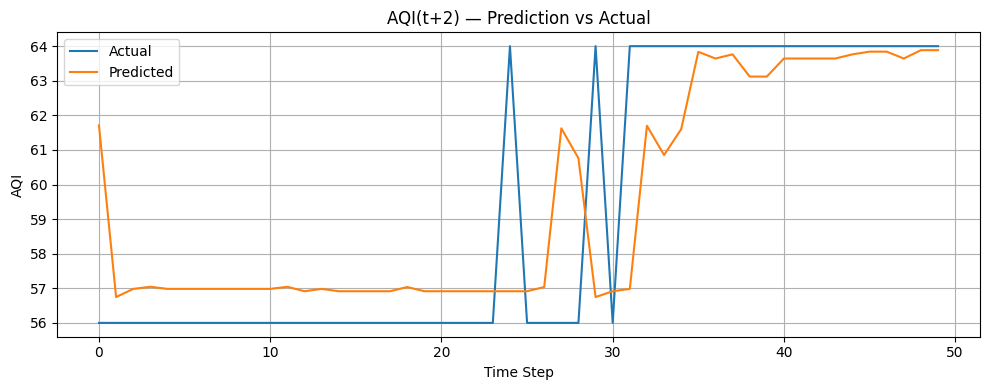

In [290]:
import matplotlib.pyplot as plt

for i, col in enumerate(target_cols):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test[col].values[:50], label='Actual')
    plt.plot(preds[:50, i], label='Predicted')
    plt.title(f'{col} — Prediction vs Actual')
    plt.xlabel('Time Step')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [291]:
import pandas as pd

# Convert predictions to DataFrame
pred_df = pd.DataFrame(preds, columns=target_cols)

# Compare first few predicted vs actual values
comparison_df = pd.concat([pred_df, y_test.reset_index(drop=True)], axis=1)
comparison_df.columns = [f'Predicted_{col}' for col in target_cols] + [f'Actual_{col}' for col in target_cols]

# Show top 10 rows
print(comparison_df.head(10))


   Predicted_AQI(t)  Predicted_AQI(t+1)  Predicted_AQI(t+2)  Actual_AQI(t)  \
0         60.868253           61.637382           61.708847             56   
1         55.560204           55.804545           56.746636             56   
2         55.544652           55.931211           56.982540             56   
3         55.612576           56.003639           57.043868             56   
4         55.544652           55.931211           56.982540             56   
5         55.544652           55.931211           56.982540             56   
6         55.544652           55.931211           56.982540             56   
7         55.544652           55.931211           56.982540             56   
8         55.544652           55.931211           56.982540             56   
9         55.544652           55.931211           56.982540             56   

   Actual_AQI(t+1)  Actual_AQI(t+2)  
0             56.0             56.0  
1             56.0             56.0  
2             56.0         

In [289]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
preds_ridge = ridge_model.predict(X_test)


# Evaluation
for i, col in enumerate(target_cols):
    rmse = np.sqrt(mean_squared_error(y_test[col], preds_ridge[:, i]))
    mae = mean_absolute_error(y_test[col], preds[:, i])
    r2 = r2_score(y_test[col], preds_ridge[:, i])
    print(f"📊 {col} — RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")



📊 AQI(t) — RMSE: 1.52, MAE: 0.58, R²: 0.92
📊 AQI(t+1) — RMSE: 1.73, MAE: 0.76, R²: 0.90
📊 AQI(t+2) — RMSE: 2.01, MAE: 1.03, R²: 0.86


In [292]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(target_cols))  # Output layer for 3 targets
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Predict
preds_dl = model.predict(X_test)

# Evaluate
for i, col in enumerate(target_cols):
    rmse = np.sqrt(mean_squared_error(y_test[col], preds_dl[:, i]))
    mae = mean_absolute_error(y_test[col], preds_dl[:, i])
    r2 = r2_score(y_test[col], preds_dl[:, i])
    print(f"🔮 DL {col} — RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 618.3082 - mae: 13.3678 - val_loss: 11.2320 - val_mae: 2.1940
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3582 - mae: 1.3130 - val_loss: 7.4218 - val_mae: 1.4435
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1017 - mae: 0.9321 - val_loss: 7.0618 - val_mae: 1.3305
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5137 - mae: 0.7995 - val_loss: 6.6092 - val_mae: 1.2027
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5638 - mae: 0.7443 - val_loss: 6.0247 - val_mae: 1.0579
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6711 - mae: 0.7651 - val_loss: 6.1532 - val_mae: 1.0293
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9330 - mae: 0.7727 - val_loss: 6.3503 - val_mae: 1.2343
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5279 - mae: 0.7139 - val_loss: 5.8335 - val_mae: 1.0012
Epoch 9/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

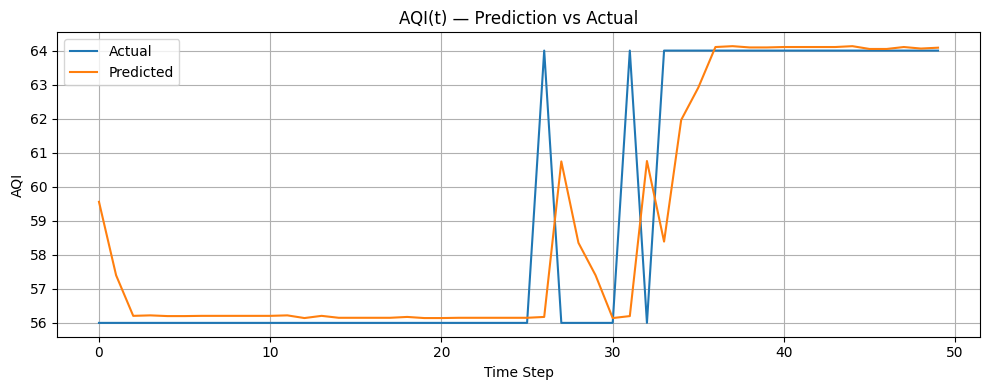

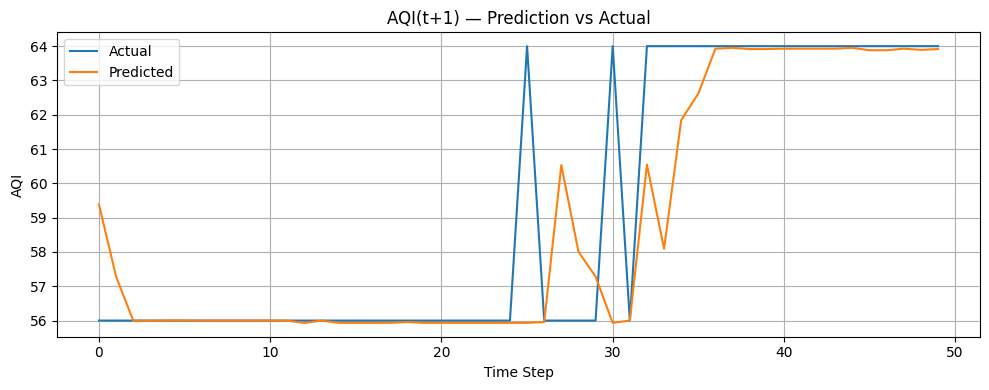

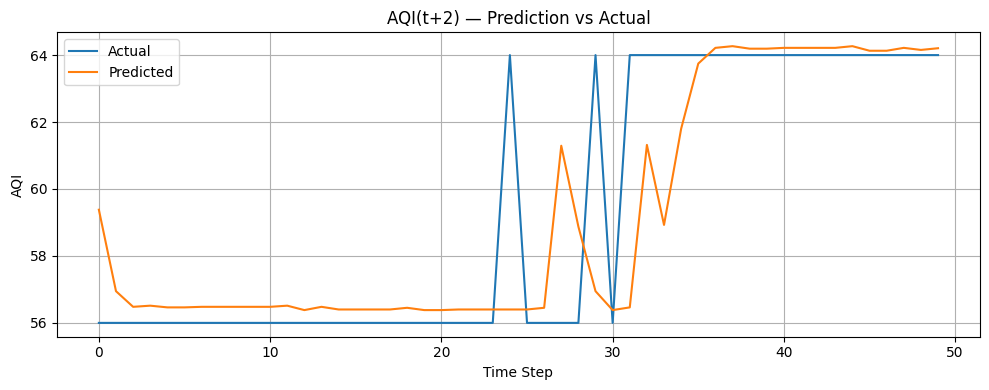

In [293]:
import matplotlib.pyplot as plt

for i, col in enumerate(target_cols):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test[col].values[:50], label='Actual')
    plt.plot(preds_dl[:50, i], label='Predicted')
    plt.title(f'{col} — Prediction vs Actual')
    plt.xlabel('Time Step')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [294]:
import pandas as pd

# Convert predictions to DataFrame
pred_df = pd.DataFrame(preds, columns=target_cols)

# Compare first few predicted vs actual values
comparison_df = pd.concat([pred_df, y_test.reset_index(drop=True)], axis=1)
comparison_df.columns = [f'Predicted_{col}' for col in target_cols] + [f'Actual_{col}' for col in target_cols]

# Show top 10 rows
print(comparison_df.head(10))


   Predicted_AQI(t)  Predicted_AQI(t+1)  Predicted_AQI(t+2)  Actual_AQI(t)  \
0         60.868253           61.637382           61.708847             56   
1         55.560204           55.804545           56.746636             56   
2         55.544652           55.931211           56.982540             56   
3         55.612576           56.003639           57.043868             56   
4         55.544652           55.931211           56.982540             56   
5         55.544652           55.931211           56.982540             56   
6         55.544652           55.931211           56.982540             56   
7         55.544652           55.931211           56.982540             56   
8         55.544652           55.931211           56.982540             56   
9         55.544652           55.931211           56.982540             56   

   Actual_AQI(t+1)  Actual_AQI(t+2)  
0             56.0             56.0  
1             56.0             56.0  
2             56.0         

In [286]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
